In [3]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv("Temps.csv")['AvgTemp']
df = df.dropna()
print("Shape : ", df.shape)
df.head()

Shape :  (1821,)


0    40.0
1    43.0
2    41.0
3    37.0
4    31.0
Name: AvgTemp, dtype: float64

<Axes: >

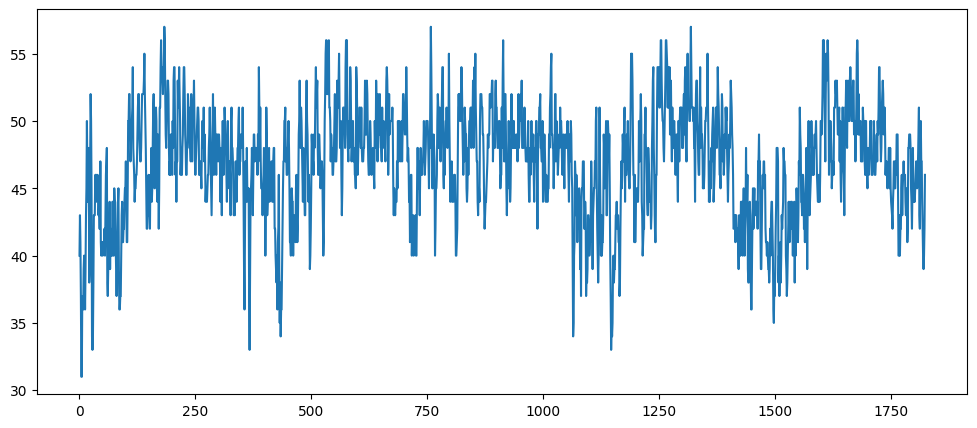

In [5]:
df.plot(figsize=(12,5))     # plot the dataset

In [6]:
from statsmodels.tsa.stattools import adfuller

def ad_test(dataset):
     dftest = adfuller(dataset, autolag = 'AIC')
     print("1. ADF : ",dftest[0])
     print("2. P-Value : ", dftest[1])
     print("3. Num Of Lags : ", dftest[2])
     print("4. Num Of Observations Used For ADF Regression:",dftest[3])
     print("5. Critical Values :")
     for key, val in dftest[4].items():
         print("\t",key, ": ", val)

ad_test(df)

1. ADF :  -6.554680125068738
2. P-Value :  8.675937480201557e-09
3. Num Of Lags :  12
4. Num Of Observations Used For ADF Regression: 1808
5. Critical Values :
	 1% :  -3.433972018026501
	 5% :  -2.8631399192826676
	 10% :  -2.5676217442756872


In [7]:
from pmdarima import auto_arima                     # auto arima can find the parameters for p d q by bruteforce
stepwise_fit = auto_arima(df, trace=True,suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=8344.146, Time=3.75 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=10347.755, Time=0.09 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=8365.701, Time=0.20 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=9136.225, Time=0.43 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=19192.139, Time=0.03 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=8355.947, Time=2.61 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=8356.308, Time=2.50 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=8347.302, Time=4.39 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=8317.537, Time=4.76 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=8330.190, Time=4.92 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=8309.520, Time=6.76 sec
 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=8332.286, Time=6.79 sec
 ARIMA(3,0,4)(0,0,0)[0] intercept   : AIC=8317.468, Time=11.57 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=8305.833, Time=9.54 sec
 ARIMA(1,0,4)(0,0,0)[0] interc

In [8]:
print(df.shape)
train=df.iloc[:-30]
test=df.iloc[-30:]
print(train.shape,test.shape)

(1821,)
(1791,) (30,)


In [ ]:
for i in range(n_test):             #this the right code
    model = ARIMA(training_data, order = (4,1,0))
    res = model.fit()
    out = res.forecast()
    model_predict.append(out)
    actual_predict = test_data[i]
    training_data.append(actual_predict)
    print(out)

#from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(train,order=(1,0,5))
model=model.fit()
model.summary()

/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


<Axes: >

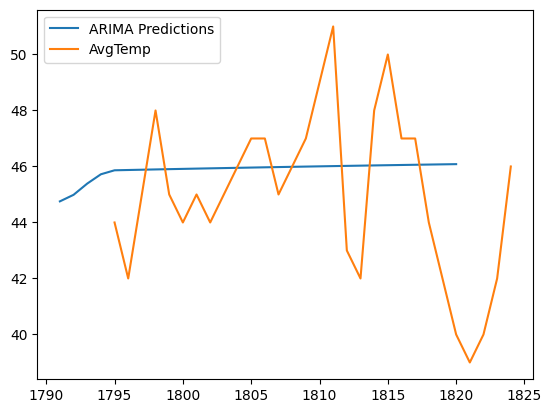

In [10]:
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')
pred.plot(legend=True)
test.plot(legend=True)